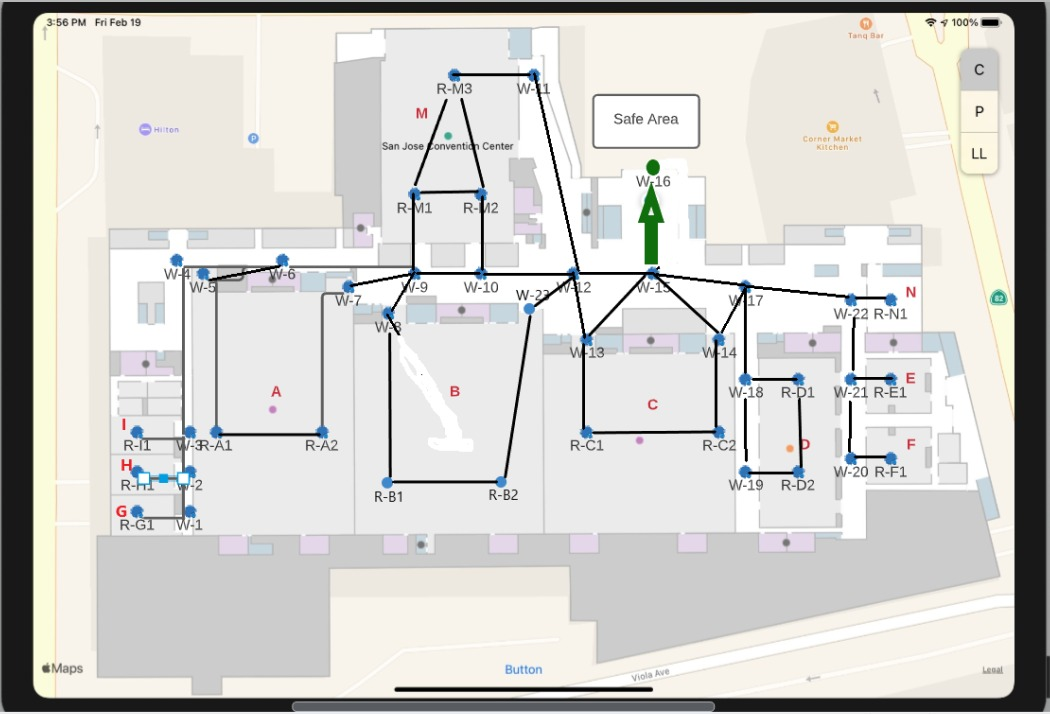

Troubleshooting of KeyError for corner rooms and with updated map according to Idea-2. Above map image is not updated one.

In [41]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import random
import pandas as pd
%matplotlib inline

In [42]:
class IndoorNavigation:
  def __init__(self):
    self.affected_nodes = []
    self.edges = [(9,16),(16,9),(10,17),(17,10),(11,18),(18,11),(16,17),(17,16),(17,18),(18,17),
                  (18,19),(19,18),(19,21),(21,19),(20,21),(21,20),(20,0),(0,20),(21,24),(24,21),
                  (22,24),(24,22),(22,1),(1,22),(24,12),(12,24),(23,24),(24,23),(23,2),(2,23),
                  (24,25),(25,24),(25,13),(13,25),(25,27),(27,25),(27,28),(28,27),(28,3),(3,28),
                  (28,30),(30,28),(30,31),(31,30),(30,29),(29,30),(30,32),(32,30),(29,4),(4,29),
                  (32,33),(33,32),(29,32),(32,29),(33,34),(34,33),(33,5),(5,33),(34,6),(6,34),
                  (32,37),(37,32),(37,36),(36,37),(37,15),(15,37),(36,7),(7,36),(35,8),(8,35),
                  (36,35),(35,36),(27,30),(30,27),(26,27),(27,26),(14,26),(26,14),(0,1),(1,0),
                  (2,38),(38,2),(39,38),(38,39),(12,13),(13,12),(13,14),(14,13),(14,12),(12,14),
                  (3,4),(4,3),(5,6),(6,5),(39,27),(27,39),(34,5),(5,34),(9,40),(40,9),(10,41),(41,10),
                  (11,42),(42,11),(7,43),(43,7),(8,44),(44,8),(15,45),(45,15)]
    self.map_names = {0:'R-A1',1:'R-A2',2:'R-B1',3:'R-C1', 4:'R-C2',5:'R-D1',6:'R-D2', 7:'R-E1', 8:'R-F1', 9:'R-G1', 10:'R-H1',
                      11:'R-I1', 12:'R-M1', 13:'R-M2',14:'R-M3', 15:'R-N1',16:'W-1',17:'W-2', 18:'W-3', 19:'W-4', 20: 'W-5',
                      21:'W-6', 22:'W-7', 23:'W-8', 24:'W-9', 25:'W-10', 26:'W-11', 27:'W-12', 28:'W-13', 29:'W-14', 30:'W-15',
                      31:'W-16', 32:'W-17', 33:'W-18', 34:'W-19', 35:'W-20', 36:'W-21', 37:'W-22', 38:'R-B2',39:'W-23',
                      40:'R-Gs', 41:'R-Hs', 42:'R-Is', 43:'R-Es', 44:'R-Fs',45:'R-Ns'}
    self.blocking_info = {(16,17):['W-1','R-G1'], (9,16):['R-G1'], (10,17):['R-H1'], (16,17):['R-G1', 'R-H1', 'W-1', 'W-2'],
                     (11,18):['R-I1'], (18,19):['W-1','W-2','W-3','R-G1','R-H1','R-I1'],
                      (19,21):['W-1','W-2','W-3','W-4','R-G1','R-H1','R-I1'], (20,21):['W-5','R-A1'], 
                      (21,24):['W-1','W-2','W-3','W-4','W-5','R-G1','R-H1','R-I1','R-A1'], (22,24):['R-A2'], 
                      (24,25):['W-1','W-2','W-3','W-4','W-5','W-6','W-7','W-9','R-G1','R-H1','R-I1','R-A1','R-A2','R-M1','R-M2'],
                      (24,12):['R-M1'], (25,13): ['R-M2'], (14,26):['R-M3'], (26,27): ['R-M3'], 
                      (25,27):['W-1','W-2','W-3','W-4','W-5','W-6','W-7','W-8','W-9','W-10','R-G1','R-H1','R-I1','R-A1','R-A2','R-B1','R-M1','R-M2'], 
                      (2,23):['R-B1'], (38,39):['R-B2'], (39,27): ['R-B2'], (28,30):['R-C1','W-13'], 
                      (27,30):['W-1','W-2','W-3','W-4','W-5','W-6','W-7','W-8','W-9','W-10','W-11','W-12','W-23','R-G1','R-H1','R-I1','R-A1','R-A2','R-B1','R-B2','R-M1','R-M2','R-M3'], 
                      (3,28):['R-C1'], (4,29):['R-C2'], (29,30):['R-C2','W-14'], (30,32):['W-17','W-18','W-19','R-D1','R-D2','W-20','W-21','W-22','R-F1','R-E1','R-N1'],
                      (33,32):['W-18','W-19','R-D1','R-D2'], (32,37):['W-20','W-21','W-22','R-F1','R-E1','R-N1'], (6,34):['R-D2'], (34,33):['W-19','R-D2'], 
                      (33,5):['R-D1'], (35,8):['R-F1'], (35,36):['W-20','R-F1'], (36,7):['R-E1'], (36,37):['W-20','W-21','R-F1','R-E1'], (37,15):['R-N1'], 
                      (30,31):['W-1','W-2','W-3','W-4','W-5','W-6','W-7','W-8','W-9','W-10','W-11','W-12','W-13','W-14','W-15','W-17','W-18','W-19','W-20','W-21','W-22','W-23','R-G1','R-H1','R-I1','R-A1','R-A2','R-B1','R-B2','R-M1','R-M2','R-M3','R-C1','R-C2','R-D1','R-D2','R-E1','R-F1','R-N1'],
                      (0,20):['R-A1'], (1,22):['R-A2']}
    self.total_episode_rewards = 0
    self.rewards_per_episode = []

  
  #Initialize graph
  def initialize_graph(self):
    #edges = e
    g = nx.Graph()
    g.add_edges_from(self.edges)
    pos = nx.spring_layout(g)
    nx.draw_networkx_nodes(g,pos)
    nx.draw_networkx_edges(g,pos)
    nx.draw_networkx_labels(g,pos)
    plt.show()
    return g


  # Initialize reward matrix
  def init_reward_matrix(self):
    r = np.matrix(np.zeros(shape = (46,46)))
    for x in g[31]:
      r[x,31] = 100
    pd.DataFrame(r)
    return r

  #Initialize Q Matrix
  def init_q_matrix(self):
    q = np.matrix(np.zeros(shape = (46,46)))
    q-=100
    for node in g.nodes:
      for x in g[node]:
        q[node,x]=0
        q[x,node]=0
    pd.DataFrame(q)
    return q

  def next_number(self,start,er):
    random_value = random.uniform(0,1)
    if random_value < er:
      sample= g[start]
      #sample = g.get(start)
    else:
      sample = np.where(q[start,] == np.max(q[start]))[1]
    next_node = int(np.random.choice(sample,1))
    return next_node

  def updateQ(self,node1,node2,lr,discount):
    max_index = np.where(q[node2,]==np.max(q[node2,]))[1]
    if max_index.shape[0]>1:
      max_index = int(np.random.choice(max_index, size = 1))
    else:
      max_index = int(max_index)
    max_value = q[node2,max_index]
    q[node1,node2] = int((1-lr)*q[node1,node2]+lr*(r[node1,node2]+discount*max_value))
    self.total_episode_rewards += r[node1,node2]
    self.rewards_per_episode.append(self.total_episode_rewards)

  def learn(self,er,lr,discount):
    for i in range(50000):
      start = np.random.randint(0,46)
      next_node = self.next_number(start,er)
      self.updateQ(start,next_node,lr,discount)    

  def shortest_path(self,begin, end):
    path = [begin]
    next_node = np.argmax(q[begin,])
    path.append(next_node)
    while next_node != end:
      next_node = np.argmax(q[next_node,])
      path.append(next_node)
    return path

  def get_shortest_path(self,origin_iot):
    if origin_iot in self.affected_nodes:
      if origin_iot in ['R-A1','R-A2','R-B1','R-B2','R-C1','R-C2','R-D1','R-D2','R-M1','R-M2','R-M3']:
        if origin_iot == 'R-A1' and 'R-A2' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
            
        elif origin_iot == 'R-A2'and 'R-A1' in self.affected_nodes:
            #return "Sorry! There is no way out from your location. Kindly stay there until help arrives."
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-B1' and 'R-B2' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-B2' and 'R-B1' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."                    
        elif origin_iot == 'R-C1' and 'R-C2' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-C2' and 'R-C1' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-D1' and 'R-D2' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-D2' and 'R-D1' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-M1' and 'R-M2' in self.affected_nodes and 'R-M3' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-M2' and 'R-M1' in self.affected_nodes and 'R-M3' in self.affected_nodes:
            return "No safe path found, please stand by for rescue."
        elif origin_iot == 'R-M3' and 'R-M1' in self.affected_nodes and 'R-M2' in self.affected_nodes:
            #return "Sorry! There is no way out from your location. Kindly stay near the window until help arrives."
            return "No safe path found, please move close to windows and stand by for rescue."
        else:
          pass
      else:
        if origin_iot in ['R-G1','R-H1','R-I1','R-N1']:
          return "No safe path found, please move close to windows and stand by for rescue."
        else:
          return "No safe path found, please stand by for rescue."
    res = []
    for key, value in self.map_names.items():
      if origin_iot == value:
        origin = key
    for n in self.shortest_path(origin,31):
      res.append(self.map_names[n])
    return res

  def update_map(self,first_node, second_node):
    res = []
    for key, value in self.map_names.items():
      if first_node == value:
        first_node_key = key
    for key, value in self.map_names.items():
      if second_node == value:
        second_node_key = key
    self.edges.remove((first_node_key,second_node_key))
    self.edges.remove((second_node_key,first_node_key))
    if (first_node_key, second_node_key) in self.blocking_info:
      for node in self.blocking_info[(first_node_key, second_node_key)]:
        self.affected_nodes.append(node)
    elif (second_node_key,first_node_key) in self.blocking_info:
      for node in self.blocking_info[(second_node_key,first_node_key)]:
        self.affected_nodes.append(node)
   
  def evaluate_trained_model(self):
     print("Mean rewards per thousand episodes are as below:")
     print("------------------------------------------------")
     for i in range(50):
       print(" {} : Mean espiode reward: {}".format((i+1)*1000,np.mean(self.rewards_per_episode[1000*i:1000*(i+1)])))
     print("")

     # Plot a graph for visualizing rewards per thousand episodes
     X = [(i+1)*1000 for i in range(50)]
     Y = [np.mean(self.rewards_per_episode[1000*i:1000*(i+1)]) for i in range(50)]
     #plt.plot(X, Y, color='green', linestyle='dashed', linewidth = 3, marker='o', markerfacecolor='blue', markersize=12)
     plt.plot(X,Y)
     # setting x and y axis range
     plt.ylim(1,70000)
     plt.xlim(1,50010)
     # naming the x axis
     plt.xlabel('Episodes') 
     # naming the y axis
     plt.ylabel('Rewards')  
     plt.title('Mean Rewards per Thousand Episodes')
     plt.show()






Initialize the map and generate shortest path

The map is as follows:



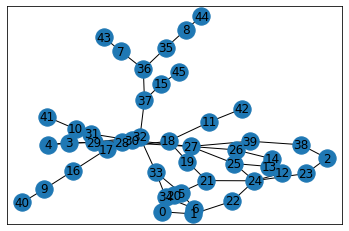

In [43]:
a = IndoorNavigation()
print("The map is as follows:\n")
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
#a.evaluate_trained_model()


In [44]:
print("Shortest path from origin 'R-B1' to the safe exit:")
a.get_shortest_path('R-B1')

Shortest path from origin 'R-B1' to the safe exit:


['R-B1', 'R-B2', 'W-23', 'W-12', 'W-15', 'W-16']

In [45]:
print("Shortest path from origin 'R-B2' to the safe exit:")
a.get_shortest_path('R-B2')

Shortest path from origin 'R-B2' to the safe exit:


['R-B2', 'W-23', 'W-12', 'W-15', 'W-16']

In [6]:
print("Shortest path from origin 'R-M2' to the safe exit:")
a.get_shortest_path('R-M2')

Shortest path from origin 'R-M2' to the safe exit:


['R-M2', 'W-10', 'W-12', 'W-15', 'W-16']

Remove edges from map and update it.

# Remove R-G1 to W-1

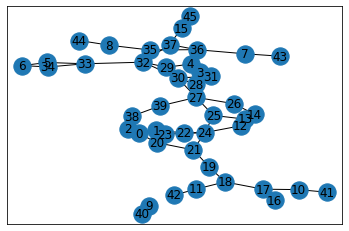

In [7]:
# Update the map
a.update_map('R-G1', 'W-1')
# Initialize the map again after the map is updated
g = a.initialize_graph()

Mean rewards per thousand episodes are as below:
------------------------------------------------
 1000 : Mean espiode reward: 173.5
 2000 : Mean espiode reward: 1564.9
 3000 : Mean espiode reward: 2379.1
 4000 : Mean espiode reward: 3425.7
 5000 : Mean espiode reward: 4494.6
 6000 : Mean espiode reward: 5933.5
 7000 : Mean espiode reward: 7598.9
 8000 : Mean espiode reward: 9254.8
 9000 : Mean espiode reward: 10641.6
 10000 : Mean espiode reward: 12396.0
 11000 : Mean espiode reward: 13811.9
 12000 : Mean espiode reward: 14820.8
 13000 : Mean espiode reward: 16336.4
 14000 : Mean espiode reward: 17319.9
 15000 : Mean espiode reward: 18274.6
 16000 : Mean espiode reward: 19224.5
 17000 : Mean espiode reward: 20569.7
 18000 : Mean espiode reward: 22478.9
 19000 : Mean espiode reward: 23510.8
 20000 : Mean espiode reward: 25118.6
 21000 : Mean espiode reward: 26647.7
 22000 : Mean espiode reward: 27765.0
 23000 : Mean espiode reward: 28917.9
 24000 : Mean espiode reward: 30705.1
 25000 :

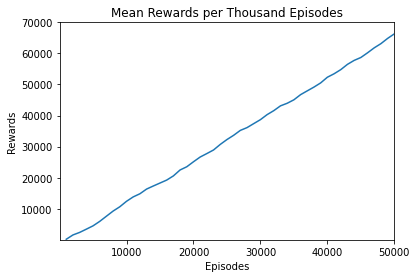

In [8]:
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
a.evaluate_trained_model()

In [9]:
# Get shortest path from the updated map
print("Shortest safe path from R-G1 is as below:")
print(a.get_shortest_path('R-G1'))


Shortest safe path from R-G1 is as below:
No safe path found, please move close to windows and stand by for rescue.


#Remove edge R-H1 to W-2

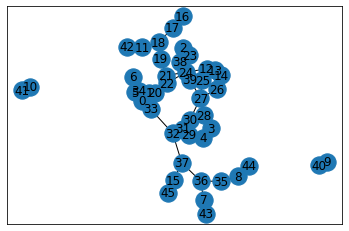

In [10]:
# Update the map
a.update_map('R-H1', 'W-2')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)


In [11]:
# Get shortest path from the updated map
print("Shortest safe path from R-H1 is as below:")
print(a.get_shortest_path('R-H1'))

Shortest safe path from R-H1 is as below:
No safe path found, please move close to windows and stand by for rescue.


#Remoe edge R-I1 to W-3

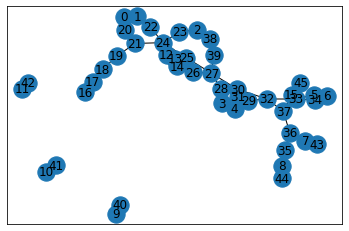

In [12]:
# Update the map
a.update_map('R-I1', 'W-3')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)


In [13]:
# Get shortest path from the updated map
print("Shortest safe path from R-I1 is as below:")
a.get_shortest_path('R-I1')

Shortest safe path from R-I1 is as below:


'No safe path found, please move close to windows and stand by for rescue.'

# Remove edge R-F1 to W-20

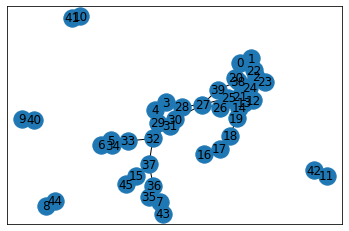

In [14]:
# Update the map
a.update_map('R-F1', 'W-20')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [15]:
# Get shortest path from the updated map
print("Shortest safe path from R-I1 is as below:")
a.get_shortest_path('R-F1')

Shortest safe path from R-I1 is as below:


'No safe path found, please stand by for rescue.'

# Remove edge R-E1 to W-21

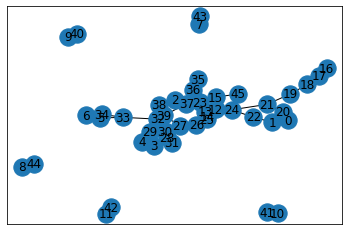

In [16]:
# Update the map
a.update_map('R-E1', 'W-21')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [17]:
# Get shortest path from the updated map
print("Shortest safe path from R-E1 is as below:")
a.get_shortest_path('R-E1')

Shortest safe path from R-E1 is as below:


'No safe path found, please stand by for rescue.'

# Remove edge R-N1 to W-22

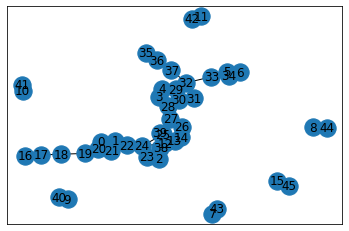

In [18]:
# Update the map
a.update_map('R-N1', 'W-22')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [19]:
# Get shortest path from the updated map
print("Shortest safe path from R-N1 is as below:")
print(a.get_shortest_path('R-N1'))

Shortest safe path from R-N1 is as below:
No safe path found, please move close to windows and stand by for rescue.


#Remove edge W-17 to W-22

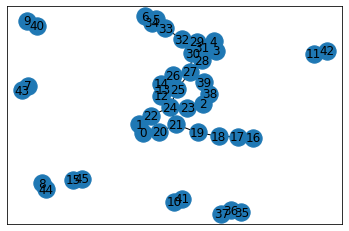

In [20]:
# Update the map
a.update_map('W-17', 'W-22')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [21]:
# Get shortest path from the updated map
print("Shortest safe path from W-17 is as below:")
print(a.get_shortest_path('W-17'))

Shortest safe path from W-17 is as below:
['W-17', 'W-15', 'W-16']


In [22]:
# Get shortest path from the updated map
print("Shortest safe path from W-22 is as below:")
print(a.get_shortest_path('W-22'))

Shortest safe path from W-22 is as below:
No safe path found, please stand by for rescue.


# Remove R-A1 to W-5

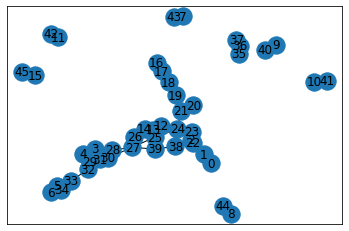

In [23]:
# Update the map
a.update_map('R-A1', 'W-5')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [24]:
# Get shortest path from the updated map
print("Shortest safe path from R-A1 is as below:")
print(a.get_shortest_path('R-A1'))

Shortest safe path from R-A1 is as below:
['R-A1', 'R-A2', 'W-7', 'W-9', 'W-10', 'W-12', 'W-15', 'W-16']


#Remove R-A2 to W-7

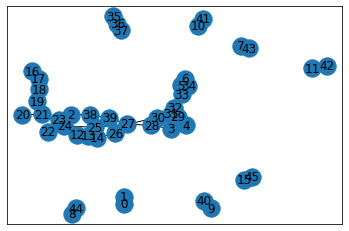

In [25]:

# Update the map
a.update_map('R-A2', 'W-7')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [26]:
# Get shortest path from the updated map
print("Shortest safe path from R-A2 is as below:")
print(a.get_shortest_path('R-A2'))

Shortest safe path from R-A2 is as below:
No safe path found, please stand by for rescue.


# Remove R-B1 to W-8

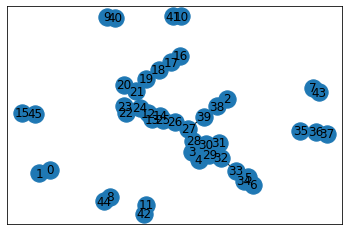

In [27]:
# Update the map
a.update_map('R-B1', 'W-8')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [28]:
# Get shortest path from the updated map
print("Shortest safe path from R-B1 is as below:")
print(a.get_shortest_path('R-B1'))

Shortest safe path from R-B1 is as below:
['R-B1', 'R-B2', 'W-23', 'W-12', 'W-15', 'W-16']


# Remove R-B2 to W-23

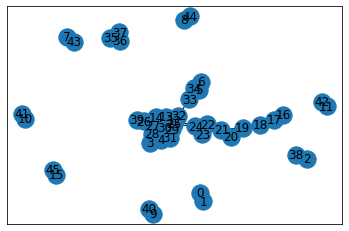

In [29]:
# Update the map
a.update_map('R-B2', 'W-23')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [30]:
# Get shortest path from the updated map
print("Shortest safe path from R-B2 is as below:")
print(a.get_shortest_path('R-B2'))

Shortest safe path from R-B2 is as below:
No safe path found, please stand by for rescue.


# Remove R-C1 to W-13

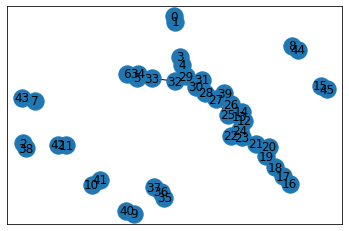

In [31]:
# Update the map
a.update_map('R-C1', 'W-13')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [32]:
# Get shortest path from the updated map
print("Shortest safe path from R-C1 is as below:")
print(a.get_shortest_path('R-C1'))

Shortest safe path from R-C1 is as below:
['R-C1', 'R-C2', 'W-14', 'W-15', 'W-16']


# Remove R-C2 to W-14

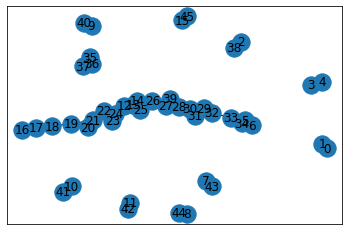

In [33]:
# Update the map
a.update_map('R-C2', 'W-14')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)

In [34]:
# Get shortest path from the updated map
print("Shortest safe path from R-C2 is as below:")
print(a.get_shortest_path('R-C2'))

Shortest safe path from R-C2 is as below:
No safe path found, please stand by for rescue.


# Remove R-D1 to W-18

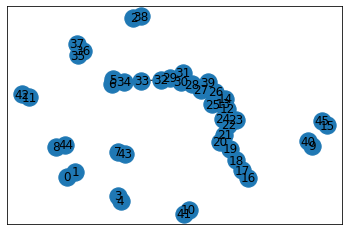

Shortest safe path from R-D1 is as below:
['R-D1', 'W-19', 'W-18', 'W-17', 'W-15', 'W-16']


In [35]:
# Update the map
a.update_map('R-D1', 'W-18')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
# Get shortest path from the updated map
print("Shortest safe path from R-D1 is as below:")
print(a.get_shortest_path('R-D1'))

#Remove R-D2 to W-19

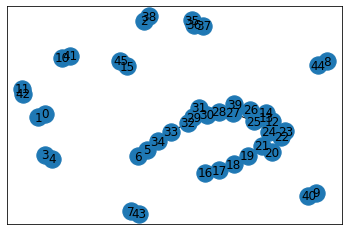

Shortest safe path from R-D2 is as below:
No safe path found, please stand by for rescue.


In [36]:
# Update the map
a.update_map('R-D2', 'W-19')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
# Get shortest path from the updated map
print("Shortest safe path from R-D2 is as below:")
print(a.get_shortest_path('R-D2'))

# Remove R-M1 to W-9

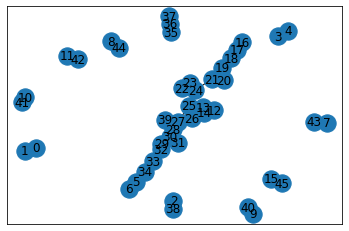

Shortest safe path from R-M1 is as below:
['R-M1', 'R-M2', 'W-10', 'W-12', 'W-15', 'W-16']


In [37]:
# Update the map
a.update_map('R-M1', 'W-9')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
# Get shortest path from the updated map
print("Shortest safe path from R-M1 is as below:")
print(a.get_shortest_path('R-M1'))

# Remove R-M2 to W-10

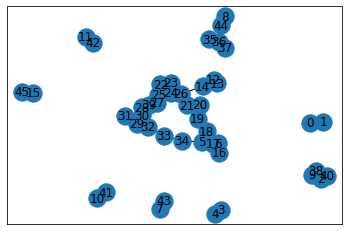

Shortest safe path from R-M2 is as below:
['R-M2', 'R-M3', 'W-11', 'W-12', 'W-15', 'W-16']


In [38]:
# Update the map
a.update_map('R-M2', 'W-10')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
# Get shortest path from the updated map
print("Shortest safe path from R-M2 is as below:")
print(a.get_shortest_path('R-M2'))

In [39]:
print("Shortest safe path from R-M2 is as below:")
a.get_shortest_path('R-M2')

Shortest safe path from R-M2 is as below:


['R-M2', 'R-M3', 'W-11', 'W-12', 'W-15', 'W-16']

# Remove R-M3 to W-11

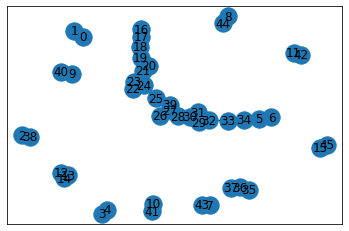

Shortest safe path from R-M3 is as below:
No safe path found, please move close to windows and stand by for rescue.


In [40]:
# Update the map
a.update_map('R-M3', 'W-11')
# Initialize the map again after the map is updated
g = a.initialize_graph()
r = a.init_reward_matrix()
q = a.init_q_matrix()
a.learn(0.5,0.8,0.8)
# Get shortest path from the updated map
print("Shortest safe path from R-M3 is as below:")
print(a.get_shortest_path('R-M3'))